## gather Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read all as string, otherwise there will be a type error

bb_df = pd.read_csv('./berlin_listings.csv', dtype=object)
mun_df = pd.read_csv('./munich_listings_sum.csv', dtype=object)

## access Data

In [3]:
#First  a look at the dataset, the shape and the the columns
#with are later needed
list(mun_df)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [4]:
bb_df.shape

(24586, 106)

In [5]:
mun_df.shape

(11481, 106)

In [6]:
bb_df.price

0         $21.00
1         $90.00
2         $28.00
3        $125.00
4         $33.00
          ...   
24581     $77.00
24582    $140.00
24583     $20.00
24584     $35.00
24585     $35.00
Name: price, Length: 24586, dtype: object

In [7]:
bb_df.cleaning_fee

0          $0.00
1        $100.00
2         $30.00
3         $39.00
4          $0.00
          ...   
24581        NaN
24582     $30.00
24583     $15.00
24584        NaN
24585     $50.00
Name: cleaning_fee, Length: 24586, dtype: object

In [8]:
bb_df.review_scores_rating

0         82
1         93
2         89
3         99
4         96
        ... 
24581    NaN
24582    NaN
24583    NaN
24584    NaN
24585    NaN
Name: review_scores_rating, Length: 24586, dtype: object

In [9]:
bb_df["cleaning_fee"].notnull().sum()

17389

In [10]:
mun_df["cleaning_fee"].notnull().sum()

7914

## clean Data

In [11]:
#To clean the Data some columns have to be transformed to numeric
#also rows with NaNs are accordingly dropped.

def clean_col(df, column):
    """
    INPUT:
    df - the pandas dataframe you want to clean
    column - the column you want to transform to numeric
    
    OUTPUT:
    smaller_df - a dataframe with all NaNs of transformed column are dropped
    """
    df[column] = df[column].str.replace("$","")
    df[column] = df[column].str.replace(",","")
    df[column] = pd.to_numeric(df[column])
    smaller_df = df.dropna(subset= [column])
    
    return smaller_df


def col_to_numeric(df, column):
    """
    INPUT:
    df - the pandas dataframe you want to transform to numeric
    
    OUTPUT:
    df[column] - the to numeric transformed column
    """
    df[column] = pd.to_numeric(df[column])
    
    return df[column]


def clean_df(df):
    """
    INPUT:
    df - the pandas dataframe you want to clean
    
    OUTPUT:
    dsmaller_df - the dataset where the specif columns are transformed to numeric
                  and the NaNs where droped. Also only with defined price range.
    """
    small_df = clean_col(df, "price")
    small_df = small_df[(small_df.price > 1)&(small_df.price <=1000)]
    
    smaller_df = clean_col(small_df, "cleaning_fee")
    smaller_df["review_scores_rating"] = col_to_numeric(smaller_df, "review_scores_rating")
    smaller_df = smaller_df.dropna(subset= ["review_scores_rating"])
    
    return smaller_df

In [12]:
#clea the dataset
clean_bb_df = clean_df(bb_df)
clean_mun_df = clean_df(mun_df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
clean_mun_df["price"].isnull().sum()

0

In [14]:
#Take a loke at the size of dataset after the cleaning
clean_bb_df.shape

(15287, 106)

In [15]:
clean_mun_df.shape

(6561, 106)

## analyse Data

In [16]:
#A closer look at the price distibution

def_bins = [0,10,20,30,40,50,60,70,80,90,100,
            110,120,130,140,150,160,170,180,190,
            200,250,300,350,400,450,500,600,700,800,900]

(array([1.800e+01, 7.770e+02, 3.471e+03, 4.142e+03, 3.509e+03, 2.933e+03,
        2.157e+03, 1.663e+03, 1.349e+03, 1.062e+03, 7.370e+02, 3.630e+02,
        5.060e+02, 2.300e+02, 2.150e+02, 3.330e+02, 1.230e+02, 9.400e+01,
        1.060e+02, 8.500e+01, 2.800e+02, 1.310e+02, 7.200e+01, 4.100e+01,
        2.400e+01, 1.900e+01, 4.900e+01, 9.000e+00, 4.000e+00, 1.000e+01]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 400, 450,
        500, 600, 700, 800, 900]),
 <a list of 30 Patch objects>)

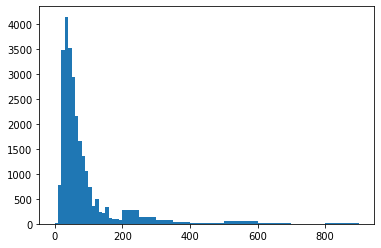

In [17]:
plt.hist(bb_df.price, bins=def_bins)


(array([   2.,   51.,  275.,  764., 1075., 1136., 1006.,  933.,  939.,
         766.,  730.,  318.,  558.,  224.,  218.,  490.,  152.,  122.,
         188.,  149.,  489.,  317.,  173.,  105.,   63.,   41.,   75.,
          32.,   23.,   17.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 400, 450,
        500, 600, 700, 800, 900]),
 <a list of 30 Patch objects>)

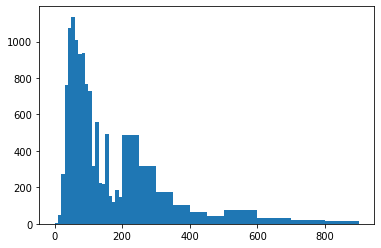

In [18]:
plt.hist(mun_df.price, bins= def_bins)

In [19]:
#create price ranges according to bins defined before

clean_mun_df["price_bins"] = pd.cut(x=clean_mun_df['price'], bins=def_bins)
clean_bb_df["price_bins"] = pd.cut(x=clean_bb_df['price'], bins=def_bins)

In [20]:
clean_bb_df["price_bins"]

0          (20, 30]
1          (80, 90]
2          (20, 30]
3        (120, 130]
4          (30, 40]
            ...    
24351      (30, 40]
24383      (60, 70]
24399      (40, 50]
24404      (30, 40]
24456      (10, 20]
Name: price_bins, Length: 15287, dtype: category
Categories (30, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (500, 600] < (600, 700] < (700, 800] < (800, 900]]

In [21]:
#Analyse genreal information

clean_bb_df["review_scores_rating"].mean()

94.86374043304768

In [22]:
clean_mun_df["review_scores_rating"].mean()

95.05395518975766

In [23]:
grouped_bb_df = clean_bb_df.groupby("price_bins").count()
grouped_mun_df = clean_mun_df.groupby("price_bins").count()

In [24]:
grouped_bb_df["id"]

price_bins
(0, 10]         11
(10, 20]       518
(20, 30]      2284
(30, 40]      2472
(40, 50]      2219
(50, 60]      1559
(60, 70]      1315
(70, 80]      1163
(80, 90]       798
(90, 100]      837
(100, 110]     294
(110, 120]     381
(120, 130]     225
(130, 140]     167
(140, 150]     251
(150, 160]     108
(160, 170]      71
(170, 180]      80
(180, 190]      57
(190, 200]     112
(200, 250]     152
(250, 300]      76
(300, 350]      40
(350, 400]      21
(400, 450]      11
(450, 500]      26
(500, 600]      16
(600, 700]       0
(700, 800]       0
(800, 900]       1
Name: id, dtype: int64

In [25]:
#create function to hava a df with all necessary information

def create_anlyse_df(df):
    """
    INPUT:
    df - the pandas dataframe you want to analyse
    
    OUTPUT:
    analysed_df - a dataframe with all NaNs of transformed column are dropped
    """
    analysed_df =  df.groupby('price_bins').agg(
                     id_count=('id', 'count'),
                     cleaning_mean=('cleaning_fee', 'mean'),
                     review_mean=('review_scores_rating', 'mean'),
                     price_sum=('price', 'mean'))
    
    return analysed_df

In [26]:
create_anlyse_df(clean_bb_df)

,id_count,cleaning_mean,review_mean,price_sum
price_bins,,,,
"(0, 10]",11,35.727273,92.818182,9.545455
"(10, 20]",518,10.266409,93.864865,18.237452
"(20, 30]",2284,13.926007,94.457093,26.859019
"(30, 40]",2472,17.497977,95.054207,36.804207
"(40, 50]",2219,21.945471,95.056782,47.199639
"(50, 60]",1559,26.353432,94.753047,57.260423
"(60, 70]",1315,30.774144,94.454753,67.221293
"(70, 80]",1163,33.839209,94.978504,77.404987
"(80, 90]",798,36.418546,95.175439,87.434837


In [27]:
create_anlyse_df(clean_mun_df)

,id_count,cleaning_mean,review_mean,price_sum
price_bins,,,,
"(0, 10]",4,58.500000,90.250000,9.500000
"(10, 20]",21,13.047619,90.095238,18.190476
"(20, 30]",198,14.454545,95.065657,27.671717
"(30, 40]",541,16.846580,94.569316,37.101664
"(40, 50]",740,20.395946,95.000000,47.245946
"(50, 60]",661,24.055976,95.337368,57.393343
"(60, 70]",611,27.180033,94.937807,67.631751
"(70, 80]",650,27.803077,94.947692,77.629231
"(80, 90]",463,32.261339,94.902808,87.758099


In [28]:
#because absolute values can not really be compared 
#therefore the values are normalized

grouped_bb_df["normalized"] = grouped_bb_df["id"] / grouped_bb_df["id"].sum()
grouped_mun_df["normalized"] = grouped_mun_df["id"] / grouped_mun_df["id"].sum()

In [29]:
grouped_mun_df["normalized"]

price_bins
(0, 10]       0.000611
(10, 20]      0.003208
(20, 30]      0.030243
(30, 40]      0.082633
(40, 50]      0.113029
(50, 60]      0.100962
(60, 70]      0.093325
(70, 80]      0.099282
(80, 90]      0.070719
(90, 100]     0.089812
(100, 110]    0.027341
(110, 120]    0.042309
(120, 130]    0.028715
(130, 140]    0.017413
(140, 150]    0.041088
(150, 160]    0.011608
(160, 170]    0.007943
(170, 180]    0.017107
(180, 190]    0.009012
(190, 200]    0.031312
(200, 250]    0.030396
(250, 300]    0.022606
(300, 350]    0.008095
(350, 400]    0.007790
(400, 450]    0.003208
(450, 500]    0.004582
(500, 600]    0.002597
(600, 700]    0.001375
(700, 800]    0.001375
(800, 900]    0.000305
Name: normalized, dtype: float64

## visualize

In [30]:
#function to have a genral histogram for both cities

def plot(df):
    """
    INPUT:
    df - the pandas dataframe to be plotted
    
    OUTPUT:
    plot that is created
    """
    objects = df.index.values
    y_pos = np.arange(len(objects))
    performance = df.normalized
    plt.figure(figsize=(10,10))
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects, rotation=80)
    plt.ylabel('frequency')
    plt.title('Price range of offers')

    plt.show()

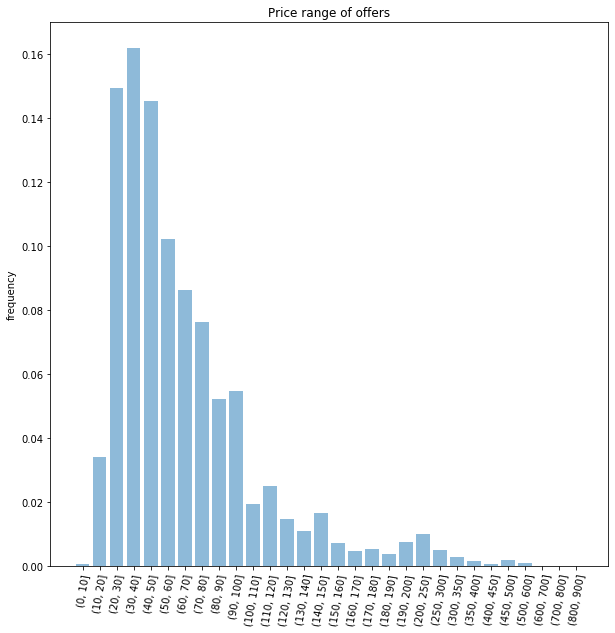

In [31]:
plot(grouped_bb_df)

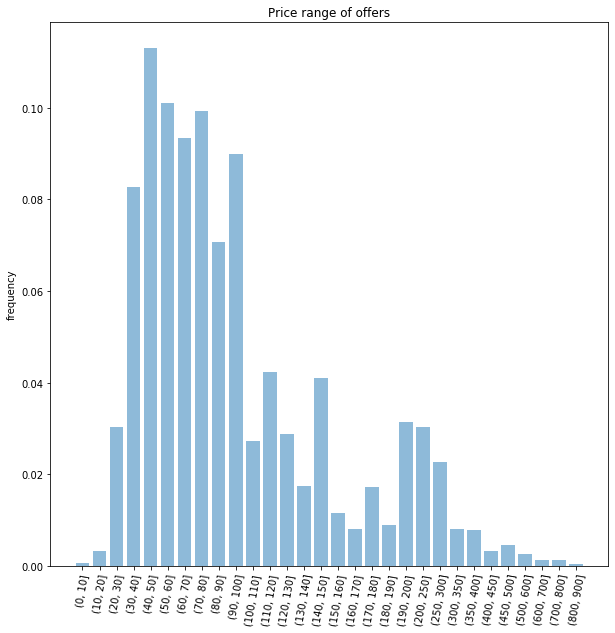

In [32]:
plot(grouped_mun_df)

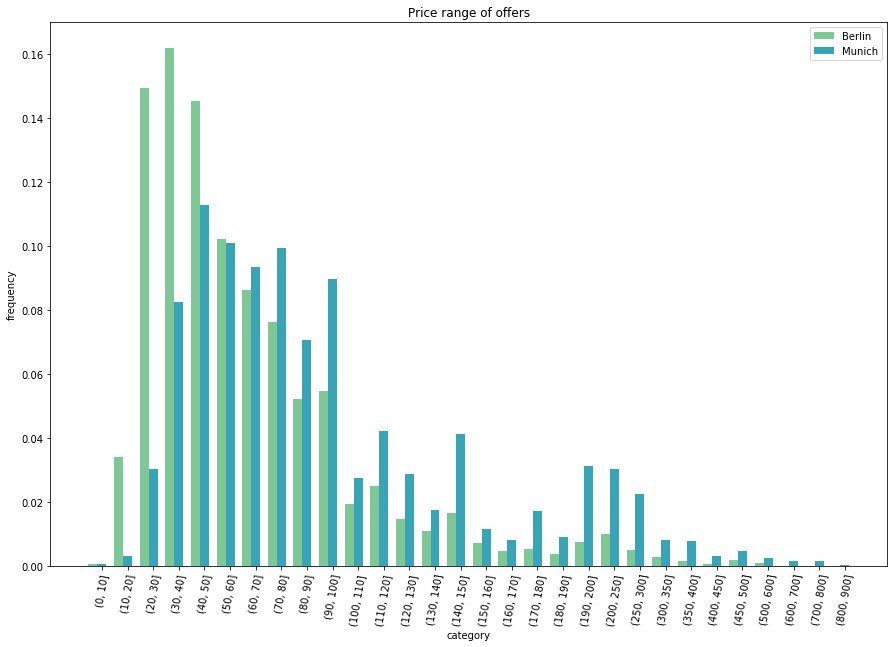

In [33]:
#Plot to visualize the diffrent price distrubtion

n_groups = 4
bb = grouped_bb_df.normalized
mun = grouped_mun_df.normalized
objects = grouped_bb_df.index.values
#n_groups = np.arange(len(objects))

bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots(figsize=(15,10))
index = np.arange(len(objects))

rects1 = plt.bar(index, bb, bar_width,
alpha=opacity,
color='#5fba7d',
label='Berlin')

rects2 = plt.bar(index + bar_width, mun, bar_width,
alpha=opacity,
color='#088DA5',
label='Munich')

plt.xlabel('category')
plt.xticks(index + bar_width, objects, rotation=80)
plt.ylabel('frequency')
plt.title('Price range of offers')
#plt.figure(figsize=(10,10))

plt.legend()
plt.show()

In [34]:
#plot to show the diffrence in review scores ratings

munich = clean_mun_df.groupby("price_bins")["review_scores_rating"].mean()
berlin = clean_bb_df.groupby("price_bins")["review_scores_rating"].mean()

comp_df = pd.merge(munich, berlin, left_index=True, right_index=True)
comp_df.columns = ['munich', 'berlin']
comp_df['diff_in_ratings'] = comp_df['berlin'] - comp_df['munich']

comp_df.drop(comp_df.tail(3).index,inplace=True)
comp_df = comp_df.sort_values("diff_in_ratings")

comp_df.style.bar(subset=['diff_in_ratings'], align='mid', color=['#088DA5', '#5fba7d'])


,munich,berlin,diff_in_ratings
price_bins,,,
"(450, 500]",95.3,90.7692,-4.53077
"(160, 170]",97.0192,94.9437,-2.07557
"(180, 190]",96.4407,95.6316,-0.809099
"(20, 30]",95.0657,94.4571,-0.608564
"(50, 60]",95.3374,94.753,-0.584321
"(200, 250]",95.201,94.7171,-0.4839
"(60, 70]",94.9378,94.4548,-0.483054
"(90, 100]",95.4779,95.037,-0.440854
"(100, 110]",95.7263,95.3367,-0.389522


In [35]:
#plot to show the diffrence in the cleaning fee

munich = clean_mun_df.groupby("price_bins")["cleaning_fee"].mean()
berlin = clean_bb_df.groupby("price_bins")["cleaning_fee"].mean()

comp_df = pd.merge(munich, berlin, left_index=True, right_index=True)
comp_df.columns = ['munich', 'berlin']
comp_df['diff_in_cleaning_fee'] = comp_df['berlin'] - comp_df['munich']

# comp_df.drop(comp_df.tail(3).index,inplace=True)
# comp_df = comp_df.sort_values("diff_in_ratings")

comp_df.style.bar(subset=['diff_in_cleaning_fee'], align='mid', color=['#088DA5', '#5fba7d'])

,munich,berlin,diff_in_cleaning_fee
price_bins,,,
"(0, 10]",58.5,35.7273,-22.7727
"(10, 20]",13.0476,10.2664,-2.78121
"(20, 30]",14.4545,13.926,-0.528538
"(30, 40]",16.8466,17.498,0.651397
"(40, 50]",20.3959,21.9455,1.54952
"(50, 60]",24.056,26.3534,2.29746
"(60, 70]",27.18,30.7741,3.59411
"(70, 80]",27.8031,33.8392,6.03613
"(80, 90]",32.2613,36.4185,4.15721
